In [1]:
import os, sys
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime, date


In [2]:
df = pd.read_csv("E-com_Data.csv", sep=',')
df.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177.0,29-10-2017,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422.0,05-10-2017,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422.0,12-10-2017,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633.0,22-08-2017,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422.0,10-10-2017,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541116 entries, 0 to 541115
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         404189 non-null  float64
 1   Item Code          537979 non-null  object 
 2   InvoieNo           537979 non-null  float64
 3   Date of purchase   537979 non-null  object 
 4   Quantity           537979 non-null  float64
 5   Time               537979 non-null  object 
 6   price per Unit     537979 non-null  float64
 7   Price              537979 non-null  float64
 8   Shipping Location  537979 non-null  object 
 9   Cancelled_status   8345 non-null    object 
 10  Reason of return   3 non-null       object 
 11  Sold as set        0 non-null       float64
dtypes: float64(6), object(6)
memory usage: 49.5+ MB


In [4]:
## To identify the percentage of missing data
df.isnull().sum()/len(df)*100


CustomerID            25.304556
Item Code              0.579728
InvoieNo               0.579728
Date of purchase       0.579728
Quantity               0.579728
Time                   0.579728
price per Unit         0.579728
Price                  0.579728
Shipping Location      0.579728
Cancelled_status      98.457817
Reason of return      99.999446
Sold as set          100.000000
dtype: float64

In [5]:
#Renaming column name for better readability
df = df.rename(columns ={'InvoieNo': 'Invoice no', 'Date of purchase': 'Date'})
df.head()

,CustomerID,Item Code,Invoice no,Date,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177.0,29-10-2017,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422.0,05-10-2017,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422.0,12-10-2017,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633.0,22-08-2017,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422.0,10-10-2017,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


In [6]:
df['CustomerID'].nunique()

4349

In [7]:
df.duplicated().sum()

3145

In [8]:
## To find the location of the duplicate
df.loc[df.duplicated(),:]

,CustomerID,Item Code,Invoice no,Date,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
61202,4043.0,15819,403353.0,02-12-2017,1.0,2:07:00 PM,447.0,447.0,Location 36,NaN,NaN,NaN
70587,3984.0,15422,405579.0,09-12-2017,24.0,2:09:00 PM,77.0,1848.0,Location 36,NaN,NaN,NaN
84823,3828.0,14519,398139.0,31-10-2017,1.0,2:04:00 PM,85.0,85.0,Location 36,NaN,NaN,NaN
120521,3384.0,15121,380588.0,11-06-2017,1.0,11:37:00 AM,298.0,298.0,Location 36,NaN,NaN,NaN
182786,2607.0,15660,393225.0,30-09-2017,1.0,12:31:00 PM,484.0,484.0,Location 36,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
541111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
541112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
541113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
541114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df = df.drop_duplicates(ignore_index = True)
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

CustomerID           133790
Item Code                 1
Invoice no                1
Date                      1
Quantity                  1
Time                      1
price per Unit            1
Price                     1
Shipping Location         1
Cancelled_status     529626
Reason of return     537968
Sold as set          537971
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537971 entries, 0 to 537970
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         404181 non-null  float64
 1   Item Code          537970 non-null  object 
 2   Invoice no         537970 non-null  float64
 3   Date               537970 non-null  object 
 4   Quantity           537970 non-null  float64
 5   Time               537970 non-null  object 
 6   price per Unit     537970 non-null  float64
 7   Price              537970 non-null  float64
 8   Shipping Location  537970 non-null  object 
 9   Cancelled_status   8345 non-null    object 
 10  Reason of return   3 non-null       object 
 11  Sold as set        0 non-null       float64
dtypes: float64(6), object(6)
memory usage: 49.3+ MB


In [12]:
# Since we can't use RMF method on Customer data that is not available,
# we are going to remove the Customer ID with null values

df = df.dropna(subset = ['CustomerID'])

In [13]:
df.isnull().sum()

CustomerID                0
Item Code                 0
Invoice no                0
Date                      0
Quantity                  0
Time                      0
price per Unit            0
Price                     0
Shipping Location         0
Cancelled_status     395998
Reason of return     404181
Sold as set          404181
dtype: int64

In [14]:
## In order to use RMF method we are only considering Customer ID, InvoiceNO, Data, Price
df = df[['CustomerID', 'Invoice no', 'Date', 'Price']]

In [15]:
df['Date'] = pd.to_datetime(df['Date'])

In [16]:
df['Date'].describe()

count                  404181
unique                    381
top       2017-11-24 00:00:00
freq                     2522
first     2016-02-12 00:00:00
last      2017-12-19 00:00:00
Name: Date, dtype: object

In [17]:
## In order for me to calculate the Latest date for Recency I'm creating a new variable Latest_date
import datetime as dt
Latest_date = dt.datetime(2017, 12, 20, 0, 0, 0)

In [18]:
# Recency = (Latest_date - Date) basis Customer_ID
# Frequency = Total count of (Invoice_no) basis Customer_ID
# Monetary = Total sum of (Price) basis Customer_ID

RFM_score = df.groupby('CustomerID').agg({'Date' : lambda x : (Latest_date - x.max()).days,
                                          'Invoice no' : lambda x: x.count(),
                                          'Price' : lambda x: x.sum()
                                          })

In [19]:
RFM_score.rename(columns = {'Date': 'Recency', 
                            'Invoice no': 'Frequency',
                            'Price': 'Monetary'}, inplace = True)

In [20]:
RFM_score.reset_index()

,CustomerID,Recency,Frequency,Monetary
0,2.0,4,182,553704.0
1,3.0,77,27,257404.0
2,4.0,20,72,176613.0
3,5.0,18,16,41976.0
4,6.0,9,84,151822.0
...,...,...,...,...
4344,4368.0,17,10,20480.0
4345,4369.0,181,7,10774.0
4346,4370.0,12,13,24962.0
4347,4371.0,4,754,280608.0


In [21]:
## Understanding Each column to segregate customers based on RFM
## On Recency customers below 25th percentile are good customers
RFM_score.Recency.describe()

count    4349.000000
mean       61.445160
std        89.656941
min         1.000000
25%        10.000000
50%        19.000000
75%        73.000000
max       617.000000
Name: Recency, dtype: float64

In [22]:
RFM_score.Frequency.describe()
## On Frequency customers above 75th percentile are good customers

count    4349.000000
mean       92.936537
std       232.086935
min         1.000000
25%        17.000000
50%        42.000000
75%       101.000000
max      7970.000000
Name: Frequency, dtype: float64

In [23]:
RFM_score.Monetary.describe()
## On Monetary customers above 75th percentile are good customers

count    4.349000e+03
mean     2.299380e+05
std      8.572589e+05
min     -5.037200e+04
25%      3.814800e+04
50%      8.365500e+04
75%      2.056120e+05
max      3.553619e+07
Name: Monetary, dtype: float64

In [24]:
# Quantile Format
quantile = RFM_score.quantile(q = [0.25, 0.50, 0.75])
quantile = quantile.to_dict()
quantile

{'Recency': {0.25: 10.0, 0.5: 19.0, 0.75: 73.0},
 'Frequency': {0.25: 17.0, 0.5: 42.0, 0.75: 101.0},
 'Monetary': {0.25: 38148.0, 0.5: 83655.0, 0.75: 205612.0}}

In [25]:
quantile


{'Recency': {0.25: 10.0, 0.5: 19.0, 0.75: 73.0},
 'Frequency': {0.25: 17.0, 0.5: 42.0, 0.75: 101.0},
 'Monetary': {0.25: 38148.0, 0.5: 83655.0, 0.75: 205612.0}}

In [26]:
## We are creating a function that segregates customers based ON RMF
def RScore(data, percentile, datapoint):
  if data < datapoint[percentile][.25]:
    return 1
  elif data < datapoint[percentile][.5]:
    return 2
  elif data < datapoint[percentile][.75]:
    return 3
  else:
    return 4

def FMScore(data, percentile, datapoint):
  if data > datapoint[percentile][0.75]:
    return 1
  elif data > datapoint[percentile][0.5]:
    return 2
  elif data > datapoint[percentile][0.75]:
    return 3
  else:
    return 4

In [27]:
RFM_score['R'] = RFM_score['Recency'].apply(RScore, args=('Recency', quantile))
RFM_score['M'] = RFM_score['Monetary'].apply(FMScore, args=("Monetary", quantile))
RFM_score["F"] = RFM_score["Frequency"].apply(FMScore, args=("Frequency", quantile))

In [28]:
RFM_score.head(20)

,Recency,Frequency,Monetary,R,M,F
CustomerID,,,,,,
2.0,4,182,553704.0,1,1,1
3.0,77,27,257404.0,4,1,4
4.0,20,72,176613.0,3,2,2
5.0,18,16,41976.0,2,4,4
6.0,9,84,151822.0,1,2,2
7.0,208,4,9410.0,4,4,4
8.0,234,58,135550.0,4,2,2
9.0,15,13,65832.0,2,4,4
10.0,16,58,331601.0,2,1,2


In [29]:
RFM_score.reset_index()

,CustomerID,Recency,Frequency,Monetary,R,M,F
0,2.0,4,182,553704.0,1,1,1
1,3.0,77,27,257404.0,4,1,4
2,4.0,20,72,176613.0,3,2,2
3,5.0,18,16,41976.0,2,4,4
4,6.0,9,84,151822.0,1,2,2
...,...,...,...,...,...,...,...
4344,4368.0,17,10,20480.0,2,4,4
4345,4369.0,181,7,10774.0,4,4,4
4346,4370.0,12,13,24962.0,2,4,4
4347,4371.0,4,754,280608.0,1,1,1


In [30]:
## SUmming up the RFM score to categorise customers
RFM_score['RFMsum'] = RFM_score[['R', 'F', 'M']].sum(axis = 1)

In [31]:
RFM_score.reset_index()

,CustomerID,Recency,Frequency,Monetary,R,M,F,RFMsum
0,2.0,4,182,553704.0,1,1,1,3
1,3.0,77,27,257404.0,4,1,4,9
2,4.0,20,72,176613.0,3,2,2,7
3,5.0,18,16,41976.0,2,4,4,10
4,6.0,9,84,151822.0,1,2,2,5
...,...,...,...,...,...,...,...,...
4344,4368.0,17,10,20480.0,2,4,4,10
4345,4369.0,181,7,10774.0,4,4,4,12
4346,4370.0,12,13,24962.0,2,4,4,10
4347,4371.0,4,754,280608.0,1,1,1,3


In [32]:
RFM_score['RFMsum'].value_counts().sort_index(ascending = False)

12    780
11    538
10    523
9     371
8     276
7     301
6     331
5     380
4     423
3     426
Name: RFMsum, dtype: int64

In [33]:
## Storing our analysis ready dataframe to another csv file.
# RFM_score.to_csv("Manual_analysis.csv")


In [34]:
RFM_score.reset_index()

,CustomerID,Recency,Frequency,Monetary,R,M,F,RFMsum
0,2.0,4,182,553704.0,1,1,1,3
1,3.0,77,27,257404.0,4,1,4,9
2,4.0,20,72,176613.0,3,2,2,7
3,5.0,18,16,41976.0,2,4,4,10
4,6.0,9,84,151822.0,1,2,2,5
...,...,...,...,...,...,...,...,...
4344,4368.0,17,10,20480.0,2,4,4,10
4345,4369.0,181,7,10774.0,4,4,4,12
4346,4370.0,12,13,24962.0,2,4,4,10
4347,4371.0,4,754,280608.0,1,1,1,3


In [35]:
## Dividing customers based on their RFM sum. Where 12 is the most loyal customer and 3 is least loyal customer.
## Quantile based discretization function is used to divide our dataset.
Loyalty_level = ["Platinum", "Gold", "Silver", "Normal"]
score_cuts = pd.qcut(RFM_score.RFMsum, q= 4, labels = Loyalty_level)
RFM_score['Loyalty_level'] = score_cuts.values
RFM_score = RFM_score.reset_index()
RFM_score

,CustomerID,Recency,Frequency,Monetary,R,M,F,RFMsum,Loyalty_level
0,2.0,4,182,553704.0,1,1,1,3,Platinum
1,3.0,77,27,257404.0,4,1,4,9,Gold
2,4.0,20,72,176613.0,3,2,2,7,Gold
3,5.0,18,16,41976.0,2,4,4,10,Silver
4,6.0,9,84,151822.0,1,2,2,5,Platinum
...,...,...,...,...,...,...,...,...,...
4344,4368.0,17,10,20480.0,2,4,4,10,Silver
4345,4369.0,181,7,10774.0,4,4,4,12,Normal
4346,4370.0,12,13,24962.0,2,4,4,10,Silver
4347,4371.0,4,754,280608.0,1,1,1,3,Platinum


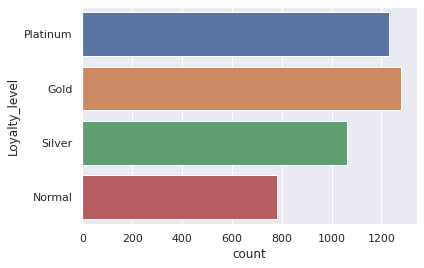

In [36]:
## Visualizing the data.
sns.countplot(y = 'Loyalty_level', data = RFM_score)
plt.show()

In [37]:
final_report = RFM_score.groupby('Loyalty_level')[['Recency', 'Frequency', 'Monetary', 'CustomerID']].agg({
    'Recency': 'mean', 'Frequency': 'mean', 'Monetary': 'mean', 'CustomerID': 'nunique'
}).reset_index()

In [38]:
final_report

,Loyalty_level,Recency,Frequency,Monetary,CustomerID
0,Platinum,10.204231,237.253865,612786.671277,1229
1,Gold,33.899140,61.024238,134458.863174,1279
2,Silver,52.802074,22.163996,46770.681433,1061
3,Normal,199.107692,14.141026,32421.729615,780


In [39]:
final_report = final_report.rename(columns= {'CustomerID': 'No_of_Customers'})
final_report['Percent_of_buyers'] = round(final_report['No_of_Customers']/final_report.No_of_Customers.sum()*100, 2)

In [40]:
final_report

,Loyalty_level,Recency,Frequency,Monetary,No_of_Customers,Percent_of_buyers
0,Platinum,10.204231,237.253865,612786.671277,1229,28.26
1,Gold,33.899140,61.024238,134458.863174,1279,29.41
2,Silver,52.802074,22.163996,46770.681433,1061,24.40
3,Normal,199.107692,14.141026,32421.729615,780,17.94


In [41]:
## Using suqrify and plotly to visualize our results
!pip install squarify
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
import squarify

In [43]:
final_report_1 = final_report[['Loyalty_level', 'No_of_Customers', 'Percent_of_buyers']]

In [44]:
final_report_1

,Loyalty_level,No_of_Customers,Percent_of_buyers
0,Platinum,1229,28.26
1,Gold,1279,29.41
2,Silver,1061,24.40
3,Normal,780,17.94


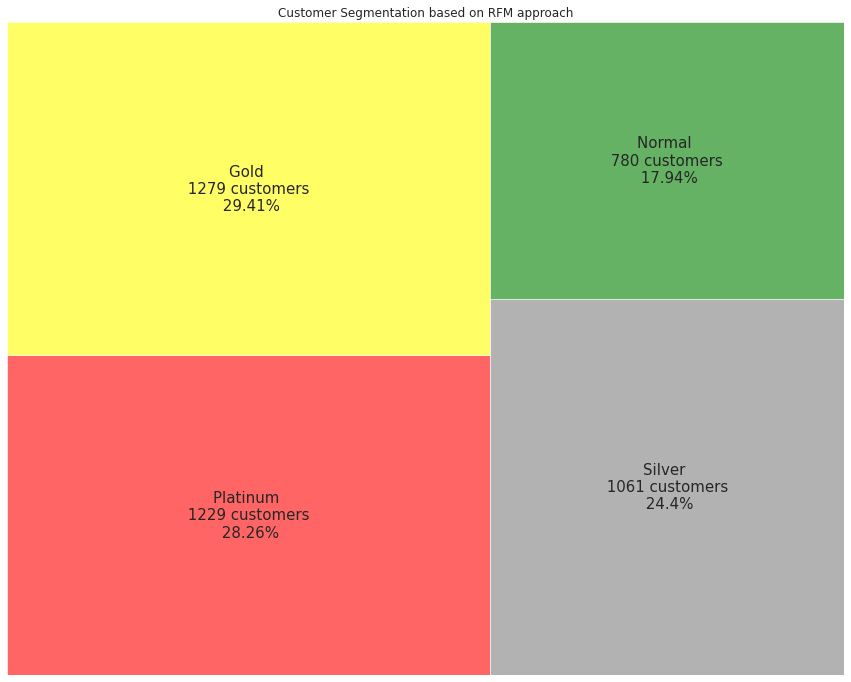

In [45]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(15,12)
color_dics = {'Platinum': 'red', 'Gold': 'yellow', 'Silver': 'grey', 'Normal': 'green'}
squarify.plot(sizes = final_report_1['No_of_Customers'], text_kwargs={'fontsize':15}, color = color_dics.values(),
              label= ['{} \n {} customers \n {}%'.format(*final_report_1.iloc[i]) for i in range(0, len(final_report_1))],
            alpha = .6)
plt.title("Customer Segmentation based on RFM approach")
plt.axis('off')
plt.show()